## Week 02 - Regression

By Jorge Abrego

### Getting the dataset

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv -P ./data

--2023-09-25 02:10:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: './data/housing.csv'

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.006s  

2023-09-25 02:10:52 (223 MB/s) - './data/housing.csv' saved [1423529/1423529]



### Loading libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### EDA

In [3]:
data = pd.read_csv('data/housing.csv')

In [4]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
num_cols = data.select_dtypes(include=np.number).columns

In [7]:
num_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

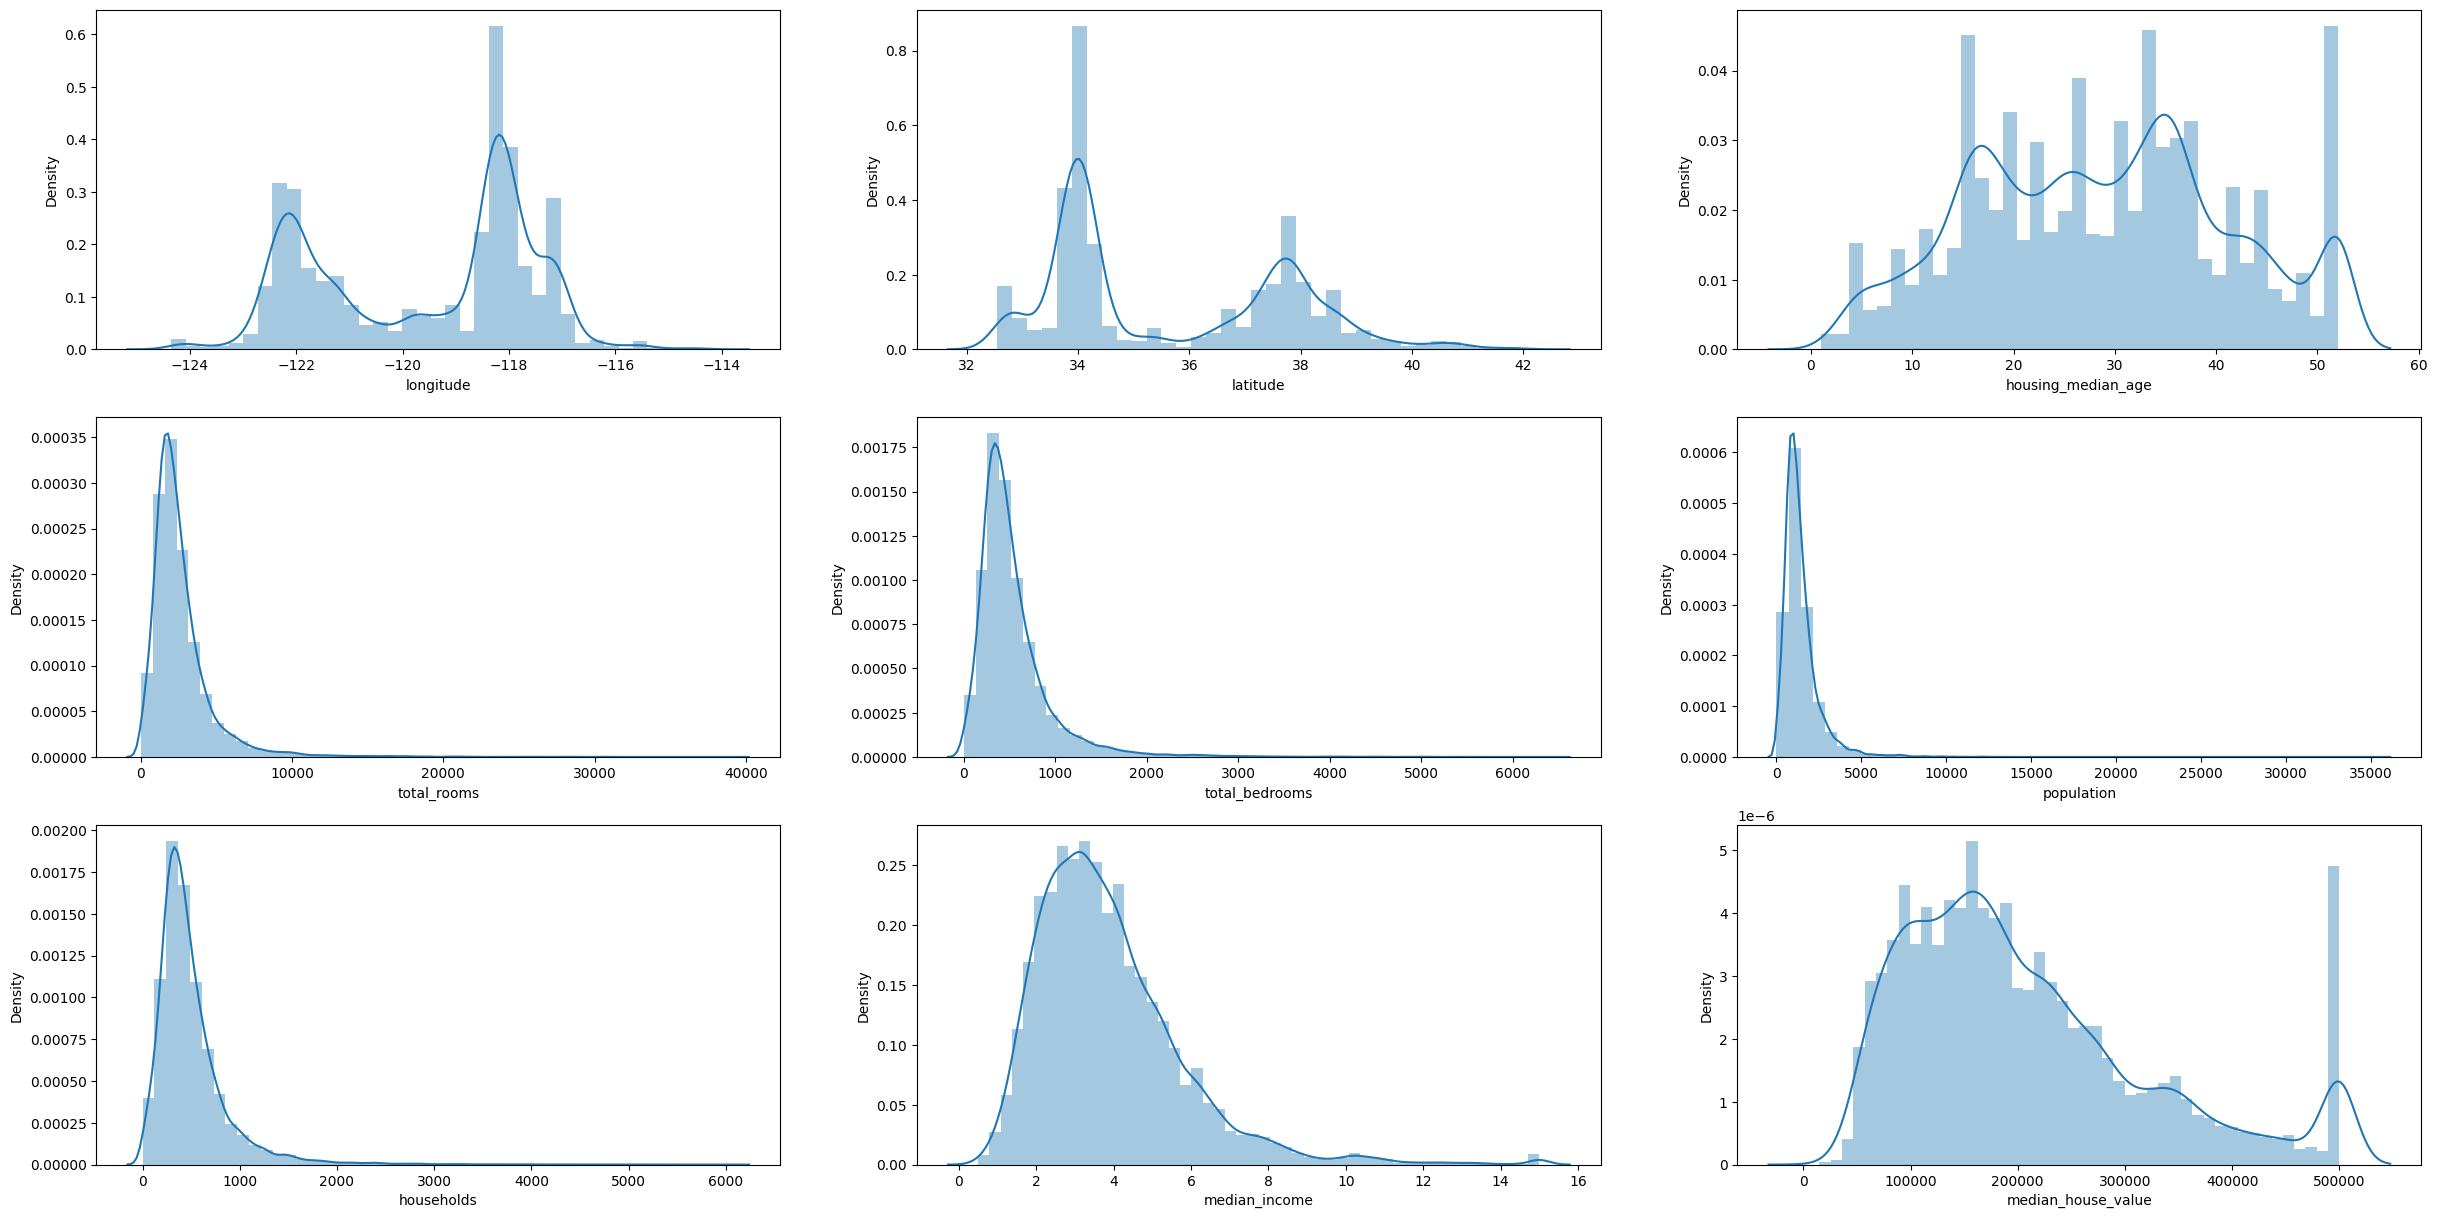

In [8]:
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30,15))
for i, column in enumerate(num_cols):
    sns.distplot(data[column],ax=axes[i//n_cols,i%n_cols])
plt.show()

<Axes: xlabel='median_house_value', ylabel='Count'>

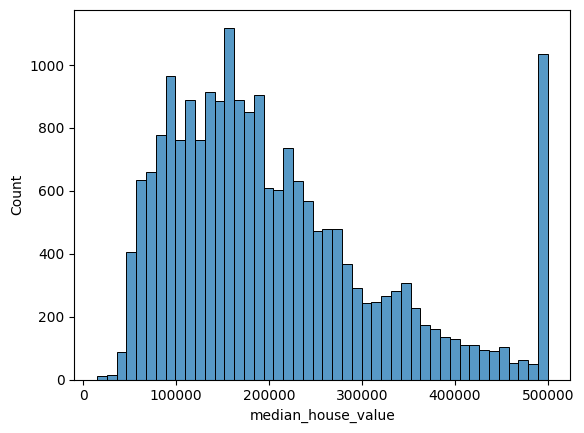

In [9]:
sns.histplot(data['median_house_value'])

In [10]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Preparing the dataset

In [11]:
selected_houses = ['<1H OCEAN', 'INLAND']
df = data[data['ocean_proximity'].isin(selected_houses)][num_cols].copy()

In [12]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Question 1

There's one feature with missing values. What is it?

In [13]:
df.isna().sum()[df.isna().sum()>0]

total_bedrooms    157
dtype: int64

In [14]:
print(f"Column \033[1mtotal_bedrooms\033[0m has missing values.")

Column total_bedrooms has missing values.


### Question 2
What's the median (50% percentile) for variable 'population'?

In [15]:
df['population'].median()

1195.0

In [16]:
print(f"The median (50% percentile) for variable 'population' is \033[1m1195\033[0m.")

The median (50% percentile) for variable 'population' is 1195.


### Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [17]:
np.random.seed(42)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [18]:
y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Functions to use

In [19]:
#-- Linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)    
    return w[0], w[1:]

#-- Data preparation
check = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
         'total_bedrooms', 'population', 'households', 'median_income']
def prepare_X(df, fill_value):
    df_num = df[check]
    df_num = df_num.fillna(fill_value)
    X = df_num.values
    return X

#-- RMSE function
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Filling it with 0

In [20]:
X_null_train = prepare_X(df_train, fill_value=0)
w_0_null, w_null = train_linear_regression(X_null_train, y_train)

In [21]:
X_null_val = prepare_X(df_val, fill_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [22]:
np.round(rmse(y_val, y_null_pred_val),2)

0.34

Filling it with mean

In [23]:
mean = df_train['total_bedrooms'].mean()

X_mean_train = prepare_X(df_train, fill_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

In [24]:
X_mean_val = prepare_X(df_val, fill_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [25]:
np.round(rmse(y_val, y_mean_pred_val),2)

0.34

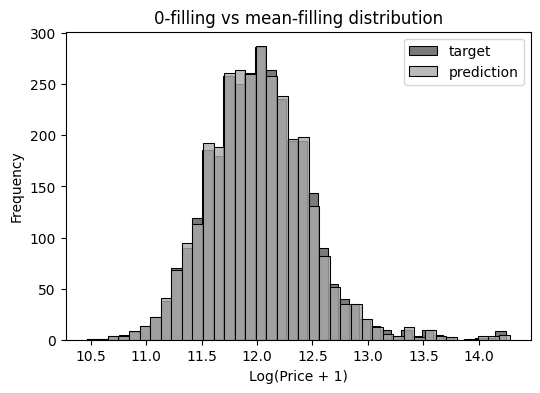

In [26]:
plt.figure(figsize=(6, 4))

sns.histplot(y_null_pred_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_mean_pred_val, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('0-filling vs mean-filling distribution')

plt.show()

In [27]:
print("Both are equally good")

Both are equally good


### Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [28]:
#-- Linear regression function with regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [29]:
X_train = prepare_X(df_train, fill_value=0)

In [30]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [31]:
for r in r_values:
    w_0, w = train_linear_regression_reg(X_null_train, y_train, r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val), 6)
    print(r, w_0, rmse_val)

0 -9.763249477709273 0.340848
1e-06 -9.763228831095896 0.340848
0.0001 -9.761185235537464 0.340848
0.001 -9.742646249218541 0.340851
0.01 -9.561056192946817 0.340878
0.1 -8.058889769445528 0.341286
1 -3.133154278318321 0.344896
5 -0.8410867974768993 0.34774
10 -0.43811723154710225 0.348315


In [32]:
print("The r value with the best RMS value is \033[1m0\033[0m.")

The r value with the best RMS value is 0.


### Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

In [33]:
#-- Train, test, validation splitting function
def train_test_val_split(df, seed):
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    y_train_orig = df_train['median_house_value'].values
    y_val_orig = df_val['median_house_value'].values
    y_test_orig = df_test['median_house_value'].values

    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    return [df_train, df_test, df_val, y_train, y_test, y_val]

In [34]:
rmse_list = []

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
    df_train, df_test, df_val, y_train, y_test, y_val = train_test_val_split(data, seed)
    X_null_train = prepare_X(df_train, fill_value=0)
    w_0, w = train_linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fill_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val),2)
    
    rmse_list.append(rmse_val)
    
    print(r, w_0, rmse_val)

10 -11.9003821382771 0.34
10 -11.732757373287274 0.34
10 -11.806729360710221 0.33
10 -11.587900347229327 0.34
10 -11.389470587826391 0.34
10 -11.447114275721216 0.34
10 -11.370516351397317 0.35
10 -12.473448919295977 0.34
10 -11.800287429884738 0.35
10 -11.459046830446992 0.34


In [35]:
rmse_list

[0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.34, 0.35, 0.34]

In [36]:
np.round(np.std(rmse_list),3)

0.005

In [37]:
print("The std value is \033[1m0.005\033[0m.")

The std value is 0.005.


### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [38]:
#-- Train, test, validation splitting function
def train_val_combined_split(df, seed):
    np.random.seed(seed)
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    frames = [df_train, df_val]
    df_train_val = pd.concat(frames)
    
    df_train_val = df_train_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_val_orig = df_train_val['median_house_value'].values
    y_test_orig = df_test['median_house_value'].values

    y_train_val = np.log1p(df_train_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train_val['median_house_value']
    del df_test['median_house_value']
    return [df_train_val, df_val, y_train_val, y_val]

In [40]:
seed = 9

df_train_val, df_test, y_train_val, y_test = train_val_combined_split(data, seed)

X_null_train_val = prepare_X(df_train_val, fill_value=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test, fill_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test),2)

0.34

In [41]:
print("The TMSE value is \033[1m0.34\033[0m.")

The TMSE value is 0.34.
